In [1]:
import keras
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import load_model
import glob
import re
import PIL
from PIL import Image
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
def numericalSort(value):
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def get_img_path(dir_name:str):
    files = f"{dir_name}/"
    img_path = sorted(glob.glob(str(files+"*.jpg")), key=numericalSort)
    return img_path

def convertSize(img):
    h, w, c = img.shape
    longest_edge = max(h, w)
    top = 0
    bottom = 0
    left = 0
    right = 0
    if h < longest_edge:
        diff_h = longest_edge - h
        top = diff_h // 2
        bottom = diff_h - top
    elif w < longest_edge:
        diff_w = longest_edge - w
        left = diff_w // 2
        right = diff_w - left
    else:
        pass
    
    img = cv2.copyMakeBorder(img, top, bottom, left, right,
                             cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return img

In [3]:
preprocess_path = get_img_path("../../img_data/rectangle/preprocessImg3")
x_train_path, x_test_path = train_test_split(preprocess_path, test_size=0.2, shuffle=False)

x_train = np.zeros((len(x_train_path),32*32*3))
for i in range(len(x_train_path)):
    x_train[i] = np.array(Image.open(x_train_path[i])).reshape(1, 32*32*3)
x_train = x_train.reshape(len(x_train_path), 32, 32, 3)

x_test= np.zeros((len(x_test_path),32*32*3))
for i in range(len(x_test_path)):
    x_test[i] = np.array(Image.open(x_test_path[i])).reshape(1, 32*32*3)
x_test = x_test.reshape(len(x_test_path), 32, 32, 3)

df = pd.read_csv("trafficLight_class3.csv", header=0, usecols=['label'])

y_label = np.zeros(df.values.shape[0])
for j in range(df.values.shape[0]):
    y_label[j] = df.values[j]
    
# label={0:red, 1:green, 2:car}
y_train, y_test = train_test_split(y_label, test_size=0.2, shuffle=False)

In [4]:
model = load_model('trafficLight_classification2.h5')

In [5]:
trafficLight_labels = np.array([
    'green',
    'red',
    'car',
    'others'
])

In [13]:
# plt.figure(figsize=(32,32))
plt.rcParams['figure.figsize'] = (16.0, 16.0)
index = 100
right = 0
mistake = 0

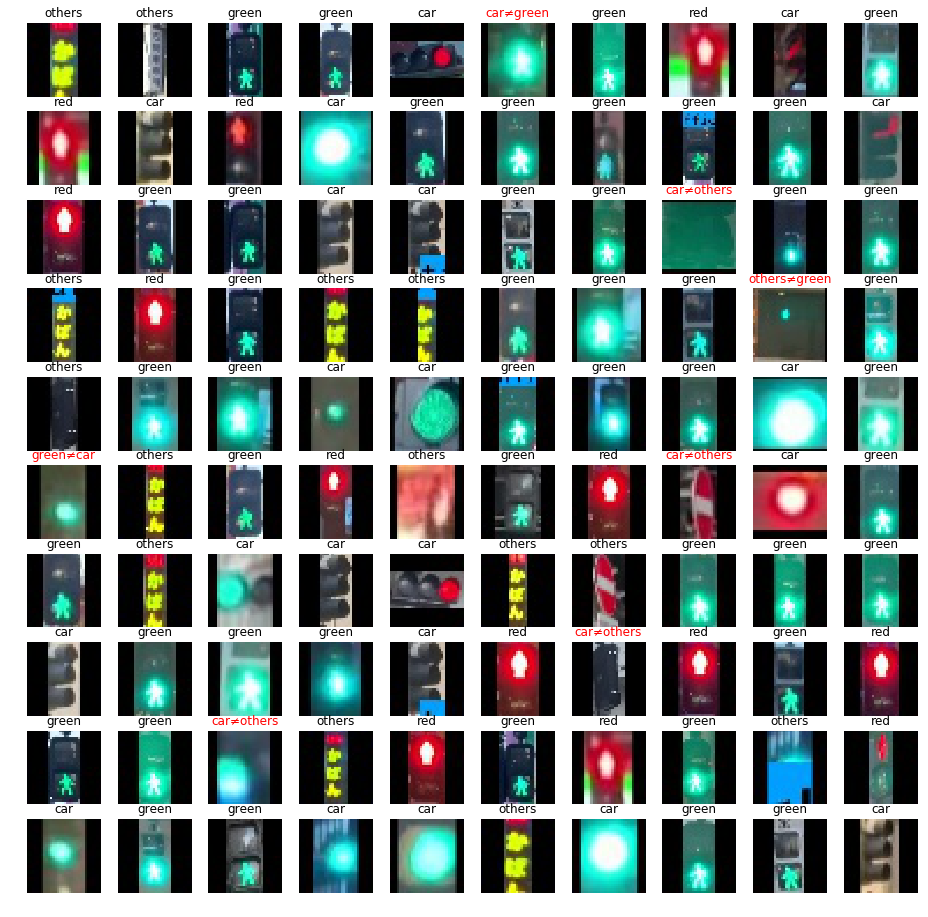

The number of correct answers:  279
The number of mistakes:  21
A correct answer rate:  93.0 %


In [16]:
for i in range(index):
    image = x_test[i]
#   data = convertSize(image)
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(10, 10, i+1)
    plt.imshow(image/255.0)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data, batch_size=1)
    bestnum  = 0.0
    bestclass = 0
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    if y_test[i] == bestclass:
        plt.title(trafficLight_labels[bestclass])
        right += 1
    else:
        plt.title(trafficLight_labels[bestclass] + '≠' + trafficLight_labels[int(y_test[i])], color = 'red')
        mistake += 1
        
plt.show()
print("The number of correct answers: ", right)
print("The number of mistakes: ", mistake)
print ("A correct answer rate: ", right/(mistake + right) * 100, '%')